### If running on AWS SageMaker, download the required libraries:

In [ ]:
#!pip install -r clustering_requirements.txt

# Generating k-Means Clustered Labels

In [2]:
import os
import sys
import pandas as pd
sys.path.append('..')
import lib.models as mods

from datetime import datetime

/Users/erictria/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-04-04 20:26:39.080523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
s3_path = 's3://hum-rnd-data/UVA/'

date_today = datetime.now().strftime('%Y-%m-%d')
# END_DATE = date_today
END_DATE = '2023-03-31'

clustering_file_name = 'clustering_data_{}.csv'.format(END_DATE)

# If running on AWS SageMaker / Reading from S3
# clustering_file_name = s3_path + clustering_file_name

### Load in data and select features

In [4]:
clustering_df = pd.read_csv(clustering_file_name)
clustering_df.sort_values(by = 'PROFILE_ID', inplace= True)
clustering_df

,PROFILE_ID,REACHED_16_EVENTS,RECENT_LAST_EVENT,EVENT_CYCLES_ALL,DISTINCT_ARTICLES_ALL,PERCENT_GOOGLE_ARTICLES_ALL,PERCENT_ARTICLE_CONTENT_ALL,AVERAGE_CONTENT_SCORE_ALL,DAYS_TO_16_EVENTS,EVENTS,FIRST_EVENT_TIME,LATEST_EVENT_TIME,DISTINCT_DAYS,ARTICLES_PER_EVENT_ALL,EVENT_DENSITY_ALL
0,--0p74IB28LFeUkXSg6b,1,0,2,2,0.00,1.000000,0.000000,133,16,2022-08-30 14:30:38.171966,2023-01-10 16:43:55.720219,2,0.125000,8.000000
1,--6dYIIB8Tq1gs32cnxN,1,0,1,1,1.00,1.000000,0.000000,7,16,2022-08-02 22:11:48.120981,2022-08-09 16:19:25.990118,4,0.062500,4.000000
2,--7CGYYBRkWobPtw2Qjb,1,1,5,1,1.00,1.000000,0.000000,27,29,2023-02-04 00:10:45.911994,2023-03-30 05:31:48.525783,6,0.034483,4.833333
3,--7egIIBGoM3uBpFKICG,1,0,11,11,1.00,0.916667,1383.888889,5,63,2022-08-09 04:30:20.132357,2023-01-04 17:26:37.806226,15,0.174603,4.200000
4,--7xtoIBGoM3uBpFf0FV,1,0,3,2,0.00,1.000000,0.000000,103,16,2022-08-19 16:30:57.064488,2022-11-30 19:41:43.155668,4,0.125000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135540,zzlKjIIBGoM3uBpFBagQ,1,1,6,5,0.80,1.000000,0.000000,133,40,2022-08-11 09:43:58.953482,2023-03-25 12:01:41.668617,7,0.125000,5.714286
135541,zzpjDYQBEEdskq5qGMuW,1,0,5,1,0.00,1.000000,0.000000,17,28,2022-10-25 04:25:09.614383,2023-02-11 00:25:21.186098,12,0.035714,2.333333
135542,zzrPDIQBEEdskq5qZRER,1,1,5,4,0.25,1.000000,0.000000,129,18,2022-10-25 01:43:50.150416,2023-03-29 09:18:49.188192,5,0.222222,3.600000
135543,zzsQPYQBwWEOklUHCNVJ,1,0,1,0,0.00,0.000000,0.000000,2,56,2022-11-03 10:36:12.009305,2022-11-08 11:59:11.293372,6,0.000000,9.333333


In [5]:
feature_list = [
    'ARTICLES_PER_EVENT_ALL',
    'PERCENT_GOOGLE_ARTICLES_ALL',
    'PERCENT_ARTICLE_CONTENT_ALL',
    'EVENT_DENSITY_ALL'
]
data = clustering_df[feature_list]
data

,ARTICLES_PER_EVENT_ALL,PERCENT_GOOGLE_ARTICLES_ALL,PERCENT_ARTICLE_CONTENT_ALL,EVENT_DENSITY_ALL
0,0.125000,0.00,1.000000,8.000000
1,0.062500,1.00,1.000000,4.000000
2,0.034483,1.00,1.000000,4.833333
3,0.174603,1.00,0.916667,4.200000
4,0.125000,0.00,1.000000,4.000000
...,...,...,...,...
135540,0.125000,0.80,1.000000,5.714286
135541,0.035714,0.00,1.000000,2.333333
135542,0.222222,0.25,1.000000,3.600000
135543,0.000000,0.00,0.000000,9.333333


### Create k-Means labels

In [6]:
etm_kmeans = mods.EtmKMeans(data)
labels = etm_kmeans.generate_labels(
    clusters = 2,
    max_iter = 500,
    random_state = 82113
)
labels

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

##### Check proportion of labels that are 1

In [7]:
# proportion of labels that are 1
sum(labels)/len(labels)

0.806248847246302

### Visualize the features for each class

0.18664381606997665
-0.7766733741365964

0.13930993618961554
-0.579704811385643

0.40895973525513235
-1.7017876303360995

-0.1961061281542942
0.8160485112743039



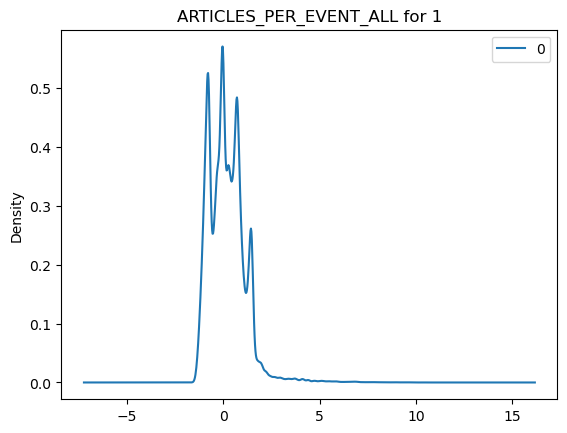

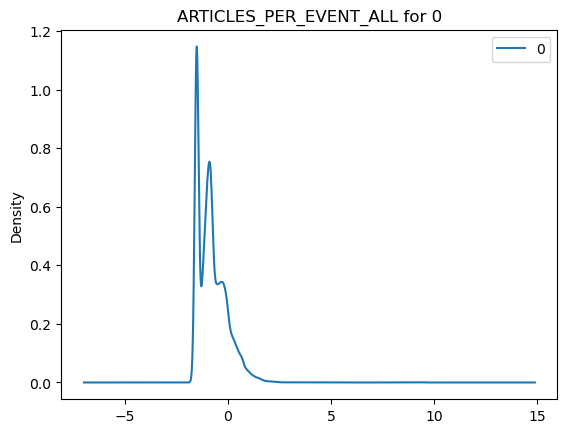

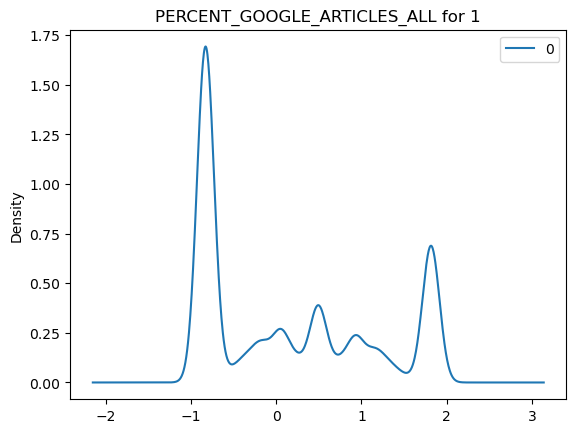

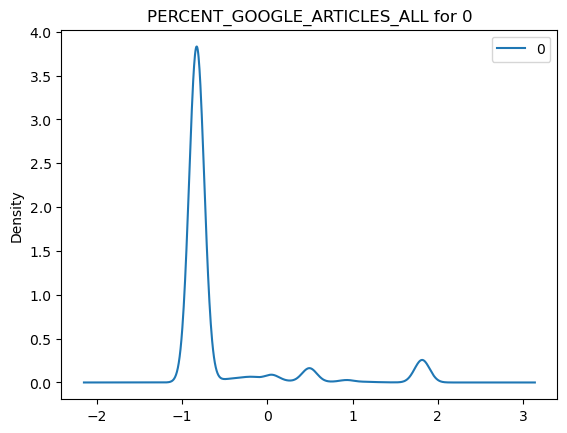

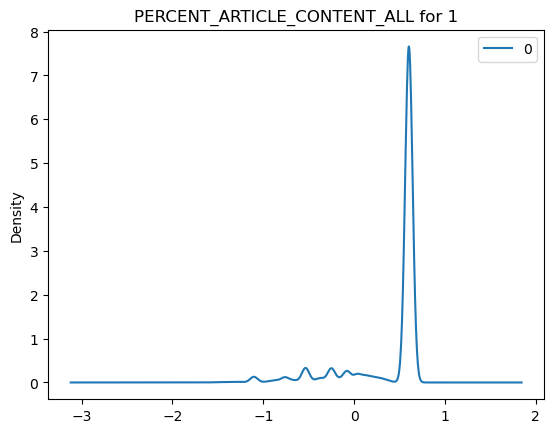

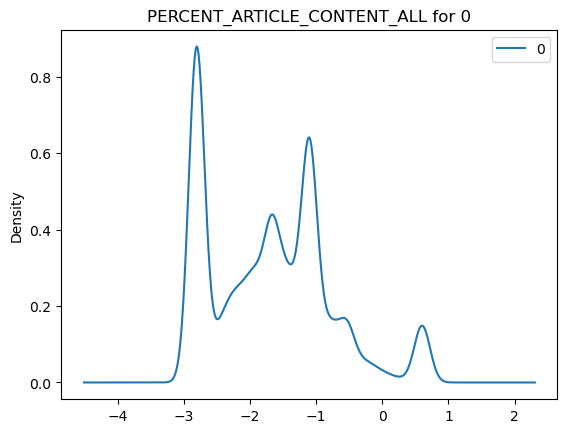

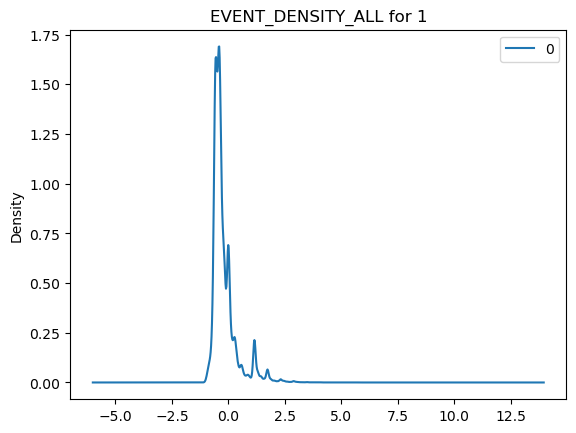

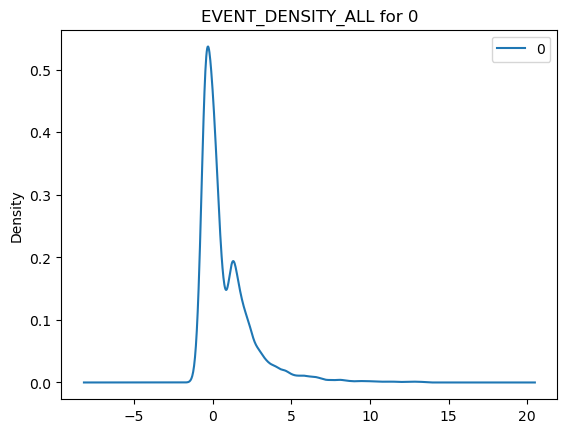

In [8]:
etm_kmeans.visualize_features()

### Use PCA for visualiztion

In [9]:
pca_components = etm_kmeans.generate_pca(components = 3)
pca_components

array([[-0.51262308, -0.42761566, -0.61215589,  0.42382495],
       [ 0.62584344, -0.61634063,  0.20528893,  0.43162563],
       [-0.01666052,  0.58923684,  0.15167009,  0.79342206]])

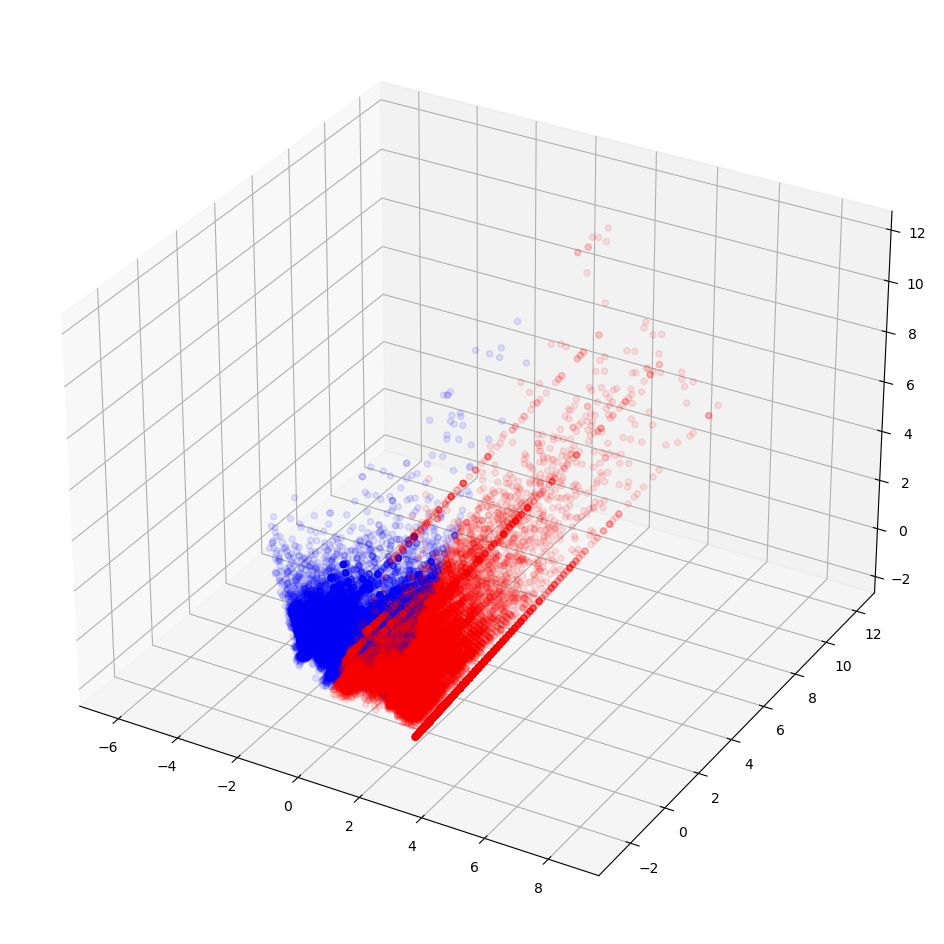

In [10]:
fig_colors = ['red', 'blue']
alpha_3d = 0.1
etm_kmeans.visualize_3d_pca(colors = fig_colors, alpha = alpha_3d)

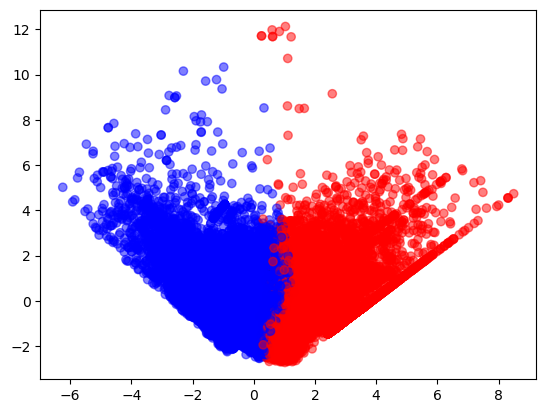

In [11]:
alpha_2d = 0.5
etm_kmeans.visualize_2d_pca(colors = fig_colors, alpha = alpha_2d)

### Save the training labels as CSV

In [13]:
s3_path = 's3://hum-rnd-data/UVA/'

training_labels_file_name = 'training_labels_{}.csv'.format(END_DATE)

# If running on AWS SageMaker / Reading from S3
# training_labels_file_name = s3_path + training_labels_file_name

In [14]:
training_labels = pd.DataFrame({'labels': labels})
training_labels.to_csv(training_labels_file_name, index = 0)